# Import Packages

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import random

# Read Dataset

In [2]:
train_dataset = pd.read_csv("train.csv")
train_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [3]:
np.unique(train_dataset['R'])

array([ 5, 20, 50], dtype=int64)

In [5]:
test_dataset = pd.read_csv("test.csv")
test_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0


In [6]:
np.unique(train_dataset['breath_id'], return_counts = True)

(array([     1,      2,      3, ..., 125743, 125745, 125749], dtype=int64),
 array([80, 80, 80, ..., 80, 80, 80], dtype=int64))

In [7]:
final_dataset = train_dataset.groupby('breath_id')
final_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035920,6035921,125749,50,10,0.000000,6.030572,0,3.939334
6035921,6035922,125749,50,10,0.033187,25.504196,0,5.345377
6035922,6035923,125749,50,10,0.066365,21.614707,0,9.563505
6035923,6035924,125749,50,10,0.099784,16.266744,0,15.117375


In [8]:
data = train_dataset.groupby(["breath_id"])
data.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035920,6035921,125749,50,10,0.000000,6.030572,0,3.939334
6035921,6035922,125749,50,10,0.033187,25.504196,0,5.345377
6035922,6035923,125749,50,10,0.066365,21.614707,0,9.563505
6035923,6035924,125749,50,10,0.099784,16.266744,0,15.117375


# Features Engineering

In [9]:
train_dataset['un_in_std'] = data['u_in'].transform(lambda x: (x - x.mean()) / x.std())
train_dataset['time_step_std'] = data['time_step'].transform(lambda x: (x - x.mean()) / x.std())

In [10]:
train_dataset['time_step_after'] = data[['time_step_std']].shift()
train_dataset['u_in_after'] = data[['un_in_std']].shift()
train_dataset['u_out_after'] = data[['u_out']].shift()
train_dataset['time_step_back'] = data[['time_step_std']].shift(-1)
train_dataset['u_in_back'] = data[['un_in_std']].shift(-1)
train_dataset['u_out_back'] = data[['u_out']].shift(-1)
train_dataset['time_step_after2'] = data[['time_step_std']].shift(2)
train_dataset['u_in_after2'] = data[['un_in_std']].shift(2)
train_dataset['u_out_after2'] = data[['u_out']].shift(2)
train_dataset['time_step_back2'] = data[['time_step_std']].shift(-2)
train_dataset['u_in_back2'] = data[['un_in_std']].shift(-2)
train_dataset['u_out_back2'] = data[['u_out']].shift(-2)
train_dataset['time_step_after3'] = data[['time_step_std']].shift(3)
train_dataset['u_in_after3'] = data[['un_in_std']].shift(3)
train_dataset['u_out_after3'] = data[['u_out']].shift(3)
train_dataset['time_step_back3'] = data[['time_step_std']].shift(-3)
train_dataset['u_in_back3'] = data[['un_in_std']].shift(-3)
train_dataset['u_out_back3'] = data[['u_out']].shift(-3)
train_dataset['time_step_after4'] = data[['time_step_std']].shift(4)
train_dataset['u_in_after4'] = data[['un_in_std']].shift(4)
train_dataset['u_out_after4'] = data[['u_out']].shift(4)
train_dataset['time_step_back4'] = data[['time_step_std']].shift(-4)
train_dataset['u_in_back4'] = data[['un_in_std']].shift(-4)
train_dataset['u_out_back4'] = data[['u_out']].shift(-4)
train_dataset['time_step_after5'] = data[['time_step_std']].shift(5)
train_dataset['u_in_after5'] = data[['un_in_std']].shift(5)
train_dataset['u_out_after5'] = data[['u_out']].shift(5)
train_dataset['time_step_back5'] = data[['time_step_std']].shift(-5)
train_dataset['u_in_back5'] = data[['un_in_std']].shift(-5)
train_dataset['u_out_back5'] = data[['u_out']].shift(-5)

In [11]:
train_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,un_in_std,time_step_std,...,u_out_after4,time_step_back4,u_in_back4,u_out_back4,time_step_after5,u_in_after5,u_out_after5,time_step_back5,u_in_back5,u_out_back5
0,1,1,20,50,0.000000,0.083334,0,5.837492,-0.993975,-1.699182,...,NaN,-1.527627,1.502404,0.0,NaN,NaN,NaN,-1.484734,1.690480,0.0
1,2,1,20,50,0.033652,18.383041,0,5.907794,0.813641,-1.656655,...,NaN,-1.484734,1.690480,0.0,NaN,NaN,NaN,-1.441756,1.677403,0.0
2,3,1,20,50,0.067514,22.509278,0,7.876254,1.221224,-1.613864,...,NaN,-1.441756,1.677403,0.0,NaN,NaN,NaN,-1.398771,1.645819,0.0
3,4,1,20,50,0.101542,22.808822,0,11.742872,1.250813,-1.570863,...,NaN,-1.398771,1.645819,0.0,NaN,NaN,NaN,-1.355737,1.750226,0.0
4,5,1,20,50,0.135756,25.355850,0,12.234987,1.502404,-1.527627,...,0.0,-1.355737,1.750226,0.0,NaN,NaN,NaN,-1.312828,1.794510,0.0


In [12]:
train_dataset.fillna(0, inplace = True)

In [13]:
train_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,un_in_std,time_step_std,...,u_out_after4,time_step_back4,u_in_back4,u_out_back4,time_step_after5,u_in_after5,u_out_after5,time_step_back5,u_in_back5,u_out_back5
0,1,1,20,50,0.000000,0.083334,0,5.837492,-0.993975,-1.699182,...,0.0,-1.527627,1.502404,0.0,0.0,0.0,0.0,-1.484734,1.690480,0.0
1,2,1,20,50,0.033652,18.383041,0,5.907794,0.813641,-1.656655,...,0.0,-1.484734,1.690480,0.0,0.0,0.0,0.0,-1.441756,1.677403,0.0
2,3,1,20,50,0.067514,22.509278,0,7.876254,1.221224,-1.613864,...,0.0,-1.441756,1.677403,0.0,0.0,0.0,0.0,-1.398771,1.645819,0.0
3,4,1,20,50,0.101542,22.808822,0,11.742872,1.250813,-1.570863,...,0.0,-1.398771,1.645819,0.0,0.0,0.0,0.0,-1.355737,1.750226,0.0
4,5,1,20,50,0.135756,25.355850,0,12.234987,1.502404,-1.527627,...,0.0,-1.355737,1.750226,0.0,0.0,0.0,0.0,-1.312828,1.794510,0.0


In [14]:
features = train_dataset.drop(['pressure', 'id', 'breath_id', 'u_in', 'time_step'], axis = 1)
target = train_dataset['pressure']

In [15]:
features.head()

,R,C,u_out,un_in_std,time_step_std,time_step_after,u_in_after,u_out_after,time_step_back,u_in_back,...,u_out_after4,time_step_back4,u_in_back4,u_out_back4,time_step_after5,u_in_after5,u_out_after5,time_step_back5,u_in_back5,u_out_back5
0,20,50,0,-0.993975,-1.699182,0.000000,0.000000,0.0,-1.656655,0.813641,...,0.0,-1.527627,1.502404,0.0,0.0,0.0,0.0,-1.484734,1.690480,0.0
1,20,50,0,0.813641,-1.656655,-1.699182,-0.993975,0.0,-1.613864,1.221224,...,0.0,-1.484734,1.690480,0.0,0.0,0.0,0.0,-1.441756,1.677403,0.0
2,20,50,0,1.221224,-1.613864,-1.656655,0.813641,0.0,-1.570863,1.250813,...,0.0,-1.441756,1.677403,0.0,0.0,0.0,0.0,-1.398771,1.645819,0.0
3,20,50,0,1.250813,-1.570863,-1.613864,1.221224,0.0,-1.527627,1.502404,...,0.0,-1.398771,1.645819,0.0,0.0,0.0,0.0,-1.355737,1.750226,0.0
4,20,50,0,1.502404,-1.527627,-1.570863,1.250813,0.0,-1.484734,1.690480,...,0.0,-1.355737,1.750226,0.0,0.0,0.0,0.0,-1.312828,1.794510,0.0


In [16]:
features = np.array(features)
features.shape

(6036000, 35)

In [17]:
features = features.reshape(int(features.shape[0]/80), 80, features.shape[1])
features.shape

(75450, 80, 35)

In [18]:
target = np.array(target)
target.shape

(6036000,)

In [19]:
target = target.reshape(75450, 80)
target.shape

(75450, 80)

# Deep Learning Model

In [20]:
norm = tf.keras.layers.Normalization(input_shape = [80, features.shape[2],], axis = -1)
norm.adapt(features)

In [21]:
m = tf.keras.Sequential([
    norm,
    tf.keras.layers.Conv1D(128, 3, activation = "relu"),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(256, 3, activation = "relu"),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences = True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(80,)
])
m.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss= "mae")

In [22]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80, 35)           71        
 n)                                                              
                                                                 
 conv1d (Conv1D)             (None, 78, 128)           13568     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 39, 128)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 39, 128)          512       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 256)           98560     
                                                        

# Training Model

In [24]:
history = m.fit(features, target, validation_split = 0.2, epochs = 350, batch_size = 512,
                callbacks = [tf.keras.callbacks.EarlyStopping(patience = 260, 
                                                              monitor = 'val_loss', 
                                                              mode = 'min', 
                                                              restore_best_weights=True)])

Epoch 1/350
118/118 [==============================] - 156s 1s/step - loss: 1.1584 - val_loss: 0.7955
Epoch 2/350
118/118 [==============================] - 155s 1s/step - loss: 1.1497 - val_loss: 0.7629
Epoch 3/350
118/118 [==============================] - 158s 1s/step - loss: 1.1427 - val_loss: 0.7624
Epoch 4/350
118/118 [==============================] - 159s 1s/step - loss: 1.1339 - val_loss: 0.7430
Epoch 5/350
118/118 [==============================] - 157s 1s/step - loss: 1.1251 - val_loss: 0.7359
Epoch 6/350
118/118 [==============================] - 157s 1s/step - loss: 1.1159 - val_loss: 0.7290
Epoch 7/350
118/118 [==============================] - 155s 1s/step - loss: 1.1135 - val_loss: 0.7124
Epoch 8/350
118/118 [==============================] - 154s 1s/step - loss: 1.1111 - val_loss: 0.7207
Epoch 9/350
118/118 [==============================] - 155s 1s/step - loss: 1.0998 - val_loss: 0.7355
Epoch 10/350
118/118 [==============================] - 157s 1s/step - loss: 1.092

118/118 [==============================] - 172s 1s/step - loss: 0.8163 - val_loss: 0.5539
Epoch 81/350
118/118 [==============================] - 170s 1s/step - loss: 0.8111 - val_loss: 0.5852
Epoch 82/350
118/118 [==============================] - 171s 1s/step - loss: 0.8107 - val_loss: 0.5328
Epoch 83/350
118/118 [==============================] - 171s 1s/step - loss: 0.8080 - val_loss: 0.5616
Epoch 84/350
118/118 [==============================] - 172s 1s/step - loss: 0.8062 - val_loss: 0.5693
Epoch 85/350
118/118 [==============================] - 176s 1s/step - loss: 0.8070 - val_loss: 0.5156
Epoch 86/350
118/118 [==============================] - 174s 1s/step - loss: 0.8032 - val_loss: 0.5260
Epoch 87/350
118/118 [==============================] - 178s 2s/step - loss: 0.8011 - val_loss: 0.5121
Epoch 88/350
118/118 [==============================] - 176s 1s/step - loss: 0.7973 - val_loss: 0.5151
Epoch 89/350
118/118 [==============================] - 175s 1s/step - loss: 0.7968 - 

118/118 [==============================] - 174s 1s/step - loss: 0.7020 - val_loss: 0.4622
Epoch 160/350
118/118 [==============================] - 181s 2s/step - loss: 0.6992 - val_loss: 0.4477
Epoch 161/350
118/118 [==============================] - 167s 1s/step - loss: 0.6980 - val_loss: 0.4563
Epoch 162/350
118/118 [==============================] - 181s 2s/step - loss: 0.7000 - val_loss: 0.4511
Epoch 163/350
118/118 [==============================] - 175s 1s/step - loss: 0.6973 - val_loss: 0.4824
Epoch 164/350
118/118 [==============================] - 176s 1s/step - loss: 0.6971 - val_loss: 0.4562
Epoch 165/350
118/118 [==============================] - 172s 1s/step - loss: 0.6942 - val_loss: 0.4460
Epoch 166/350
118/118 [==============================] - 181s 2s/step - loss: 0.6962 - val_loss: 0.4473
Epoch 167/350
118/118 [==============================] - 179s 2s/step - loss: 0.6948 - val_loss: 0.4485
Epoch 168/350
118/118 [==============================] - 178s 2s/step - loss: 

Epoch 238/350
118/118 [==============================] - 192s 2s/step - loss: 0.6350 - val_loss: 0.4249
Epoch 239/350
118/118 [==============================] - 184s 2s/step - loss: 0.6332 - val_loss: 0.4256
Epoch 240/350
118/118 [==============================] - 187s 2s/step - loss: 0.6327 - val_loss: 0.4179
Epoch 241/350
118/118 [==============================] - 180s 2s/step - loss: 0.6318 - val_loss: 0.4156
Epoch 242/350
118/118 [==============================] - 190s 2s/step - loss: 0.6338 - val_loss: 0.4393
Epoch 243/350
118/118 [==============================] - 183s 2s/step - loss: 0.6312 - val_loss: 0.4244
Epoch 244/350
118/118 [==============================] - 187s 2s/step - loss: 0.6285 - val_loss: 0.4251
Epoch 245/350
118/118 [==============================] - 187s 2s/step - loss: 0.6273 - val_loss: 0.4428
Epoch 246/350
118/118 [==============================] - 189s 2s/step - loss: 0.6280 - val_loss: 0.4166
Epoch 247/350
118/118 [==============================] - 188s 2s

118/118 [==============================] - 180s 2s/step - loss: 0.5945 - val_loss: 0.3969
Epoch 317/350
118/118 [==============================] - 177s 2s/step - loss: 0.5943 - val_loss: 0.3967
Epoch 318/350
118/118 [==============================] - 180s 2s/step - loss: 0.5934 - val_loss: 0.4051
Epoch 319/350
118/118 [==============================] - 179s 2s/step - loss: 0.5916 - val_loss: 0.4149
Epoch 320/350
118/118 [==============================] - 183s 2s/step - loss: 0.5923 - val_loss: 0.4022
Epoch 321/350
118/118 [==============================] - 182s 2s/step - loss: 0.5914 - val_loss: 0.4039
Epoch 322/350
118/118 [==============================] - 181s 2s/step - loss: 0.5904 - val_loss: 0.3956
Epoch 323/350
118/118 [==============================] - 176s 1s/step - loss: 0.5927 - val_loss: 0.4105
Epoch 324/350
118/118 [==============================] - 177s 2s/step - loss: 0.5921 - val_loss: 0.3989
Epoch 325/350
118/118 [==============================] - 184s 2s/step - loss: 

# Results:

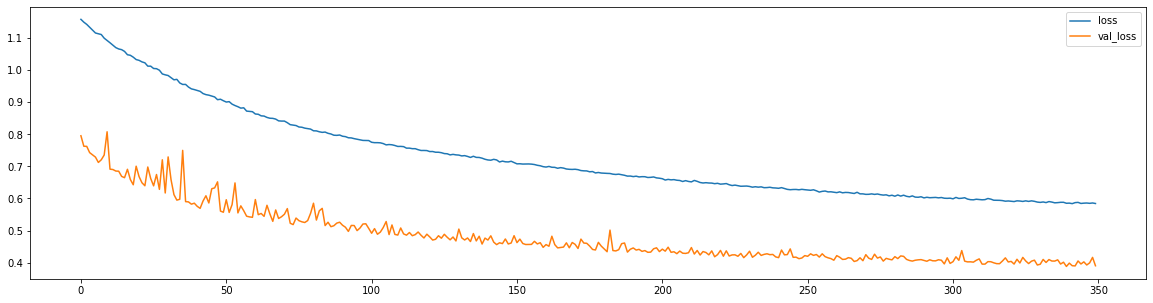

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()

In [26]:
m.evaluate(features, target)

2358/2358 [==============================] - 136s 57ms/step - loss: 0.3601


0.3600504994392395

In [27]:
y_pred = m.predict(features, batch_size = 512)

148/148 [==============================] - 65s 396ms/step


In [28]:
target[0]

array([ 5.83749171,  5.90779385,  7.87625392, 11.74287192, 12.23498694,
       12.86770625, 14.69556203, 15.8906985 , 15.53918778, 15.75009421,
       17.29674141, 17.22643927, 16.17190709, 17.36704356, 18.07006501,
       17.15613712, 18.28097145, 18.77308647, 17.85915858, 19.1245972 ,
       19.33550363, 18.49187789, 18.56218003, 18.63248218, 18.84338861,
       19.05429505, 19.26520149, 19.33550363, 19.33550363, 19.47610792,
       19.54641007, 17.01553283,  9.56350541,  7.87625392,  8.64957752,
        7.59504534,  7.66534749,  8.2980668 ,  7.24353461,  7.94655607,
        7.59504534,  7.45444105,  8.1574625 ,  6.82172174,  7.17323247,
        7.5247432 ,  6.96232603,  7.45444105,  7.59504534,  7.17323247,
        7.73564963,  7.24353461,  7.59504534,  7.3841389 ,  7.24353461,
        7.73564963,  7.5247432 ,  6.96232603,  7.10293032,  7.31383676,
        6.11870029,  7.03262818,  6.82172174,  6.54051316,  6.96232603,
        6.82172174,  6.54051316,  6.82172174,  6.82172174,  6.39

In [29]:
y_pred[0]

array([ 6.0297456,  5.9742336,  8.287188 , 11.373531 , 12.436369 ,
       13.115677 , 14.53138  , 15.364758 , 15.595917 , 16.028313 ,
       16.735107 , 16.85934  , 16.862162 , 17.198324 , 17.620728 ,
       17.762386 , 18.124607 , 18.437565 , 18.54647  , 18.717665 ,
       18.952057 , 18.928295 , 18.804419 , 18.979025 , 19.06675  ,
       19.019127 , 19.191725 , 19.350092 , 19.427456 , 19.652374 ,
       19.393421 , 16.556446 ,  9.653872 ,  8.280732 ,  7.9854236,
        7.889331 ,  7.801466 ,  7.748713 ,  7.712948 ,  7.5680213,
        7.5587234,  7.4396524,  7.348412 ,  7.2625804,  7.1776876,
        7.1694665,  7.1677217,  7.135589 ,  7.2418256,  7.2626185,
        7.3857965,  7.398846 ,  7.2661824,  7.2180815,  7.0832167,
        7.1816993,  7.1405587,  6.944108 ,  7.1595697,  6.979392 ,
        6.7901015,  6.7717056,  6.777057 ,  6.714242 ,  6.6595097,
        6.755245 ,  6.643055 ,  6.6024227,  6.5904016,  6.5153995,
        6.5088162,  6.5127616,  6.465219 ,  6.47518  ,  6.4651

In [30]:
def draw_result(start, end, target, y_pred):
  plt.figure(figsize = (20, 7))
  plt.plot(np.reshape(target[start:end], -1), linewidth=5, label = "actual Pressure values")
  plt.plot(np.reshape(y_pred[start:end], -1), linewidth=2, label = "predict Pressure values")
  plt.legend()

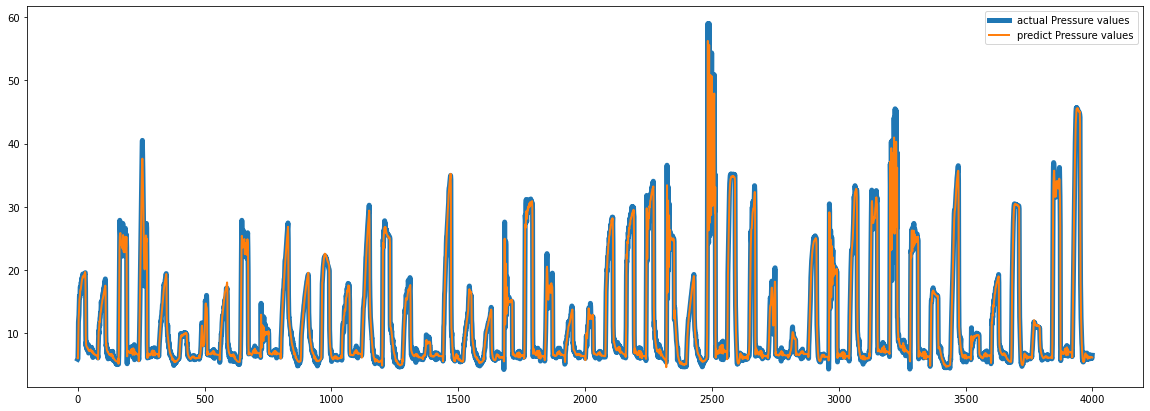

In [31]:
draw_result(0, 50, target, y_pred)

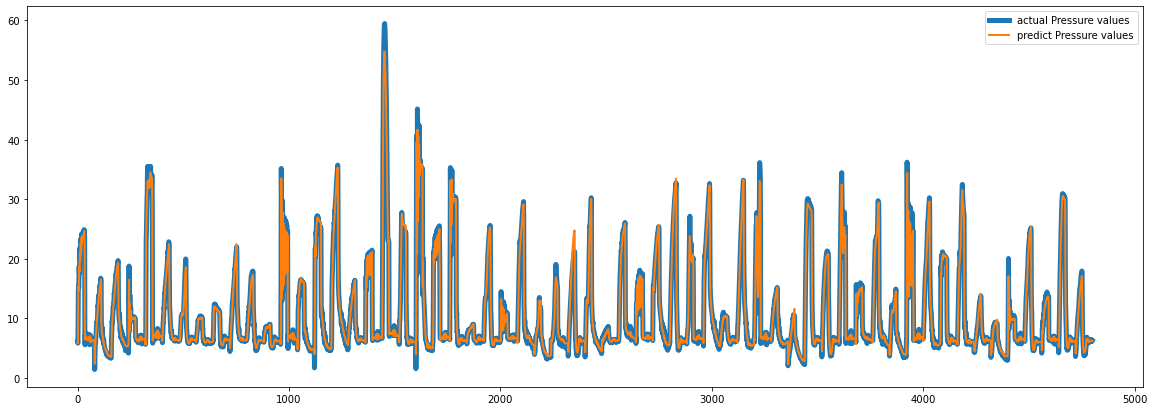

In [32]:
draw_result(50, 110, target, y_pred)

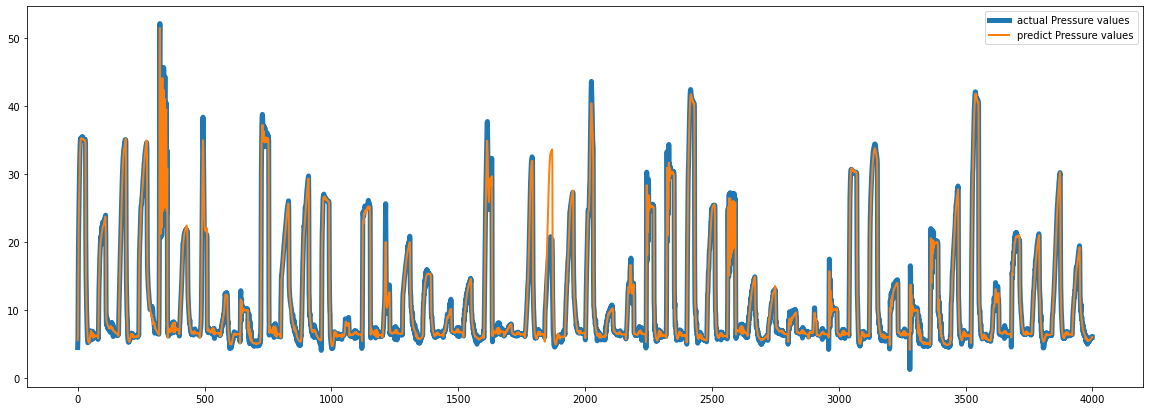

In [33]:
draw_result(110, 160, target, y_pred)

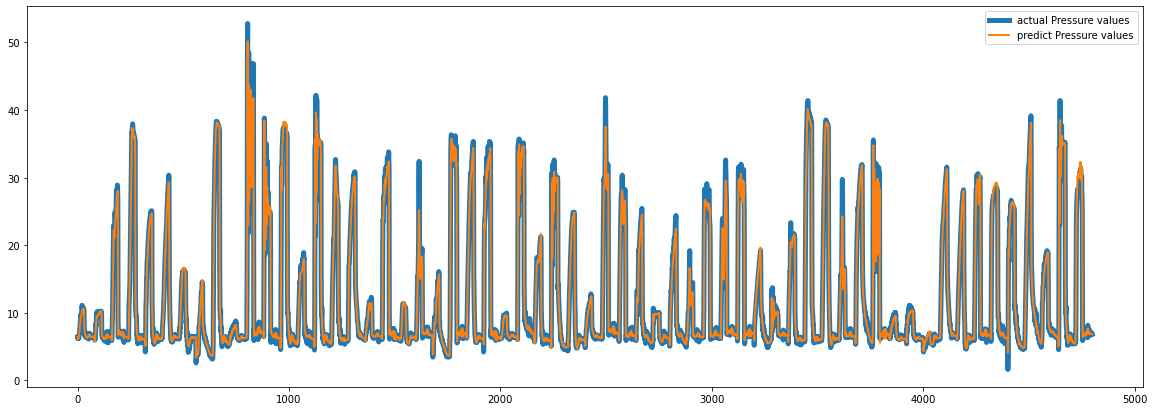

In [34]:
draw_result(160, 220, target, y_pred)

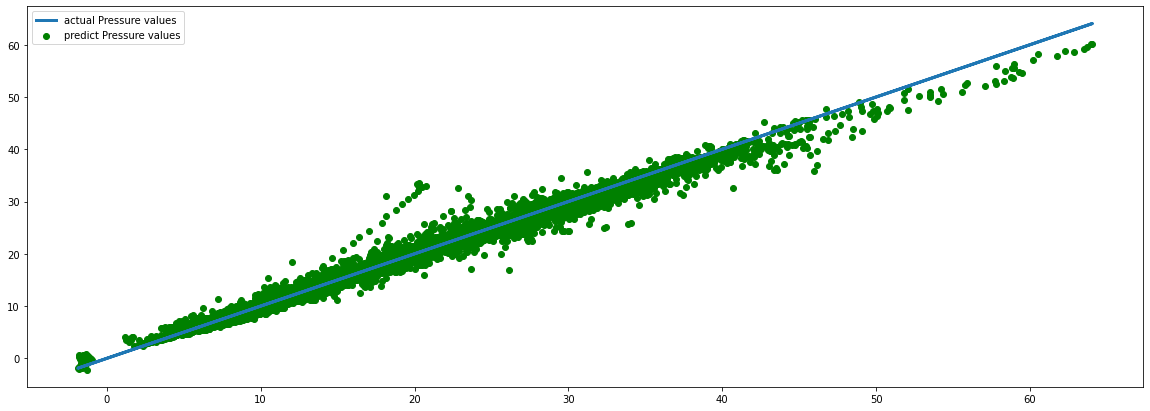

In [35]:
plt.figure(figsize = (20, 7))
plt.plot(np.reshape(target[:500], -1), np.reshape(target[:500], -1), linewidth=3, label = "actual Pressure values")
plt.scatter(np.reshape(target[:500], -1), np.reshape(y_pred[:500], -1), c = 'g', label = "predict Pressure values")
plt.legend()

In [36]:
def create_table(target, y_pred):
  target = np.reshape(target, -1)
  y_pred = np.reshape(y_pred, -1)
  return pd.DataFrame({
      "actual Pressure values": target,
      "predict Pressure values": y_pred,
      "diff": np.abs(target - y_pred)
  })

In [37]:
create_table(target, y_pred).head(40)

,actual Pressure values,predict Pressure values,diff
0,5.837492,6.029746,0.192254
1,5.907794,5.974234,0.066440
2,7.876254,8.287188,0.410934
3,11.742872,11.373531,0.369341
4,12.234987,12.436369,0.201382
5,12.867706,13.115677,0.247971
6,14.695562,14.531380,0.164182
7,15.890699,15.364758,0.525941
8,15.539188,15.595917,0.056729
9,15.750094,16.028313,0.278218


In [38]:
m.save("Ventilator_Pressure_Prediction.h5")